In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree


In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
movies['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [25]:
x = movies.drop(['index', 'id', 'genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'tagline', 'title','release_date','status', 'cast', 'crew', 'director'], axis = 1)
y = movies['status']

In [26]:
x

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238
4799,9000,0.642552,0,85.0,5.9,5
4800,0,1.444476,0,120.0,7.0,6
4801,0,0.857008,0,98.0,5.7,7


In [27]:
y

0       Released
1       Released
2       Released
3       Released
4       Released
          ...   
4798    Released
4799    Released
4800    Released
4801    Released
4802    Released
Name: status, Length: 4803, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The shape of X_train is : {}'.format(x_train.shape))
print('The shape of X_test is : {}'.format(x_test.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of y_test is : {}'.format(y_test.shape))

The shape of X_train is : (3842, 6)
The shape of X_test is : (961, 6)
The shape of y_train is : (3842,)
The shape of y_test is : (961,)


In [30]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_test = model.predict(x_test)

In [32]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print('Decisicion Tree\n', cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall : %.3f' %recall)
print('f1-score : %.3f' %f1)

Decisicion Tree
 [[959   0]
 [  2   0]]

Akurasi pada data test: 0.998
precision: 0.998
recall : 0.998
f1-score : 0.998


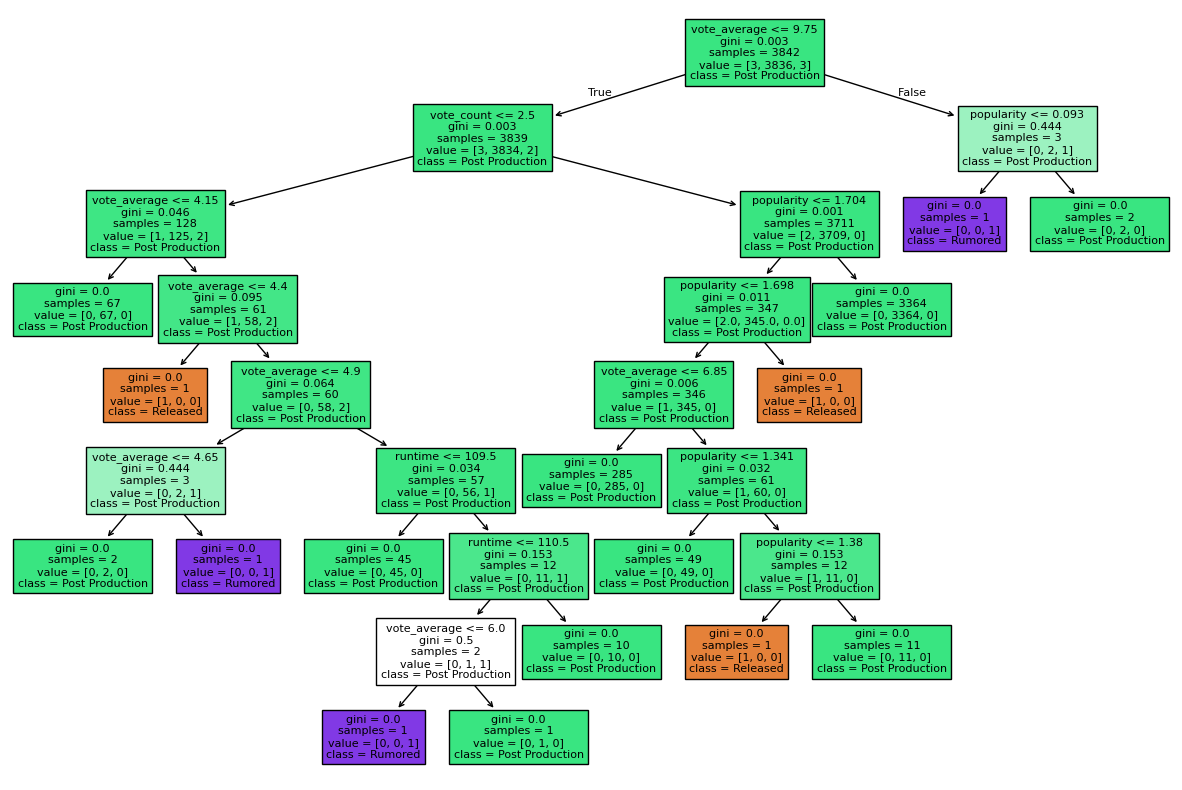

In [37]:
plt.figure(figsize=(15, 10))
plot_tree(model, 
          filled=True, 
          feature_names=x.columns,  # Nama kolom fitur (jika X adalah DataFrame)
          class_names=['Released','Post Production', 'Rumored'])  # Nama kelas target
plt.show()
